In [1]:
import tensorflow as tf

In [2]:
# 데이터 불러오기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# 네트워크 구조 정의
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(10, activation='softmax')])

In [4]:
# Keras 모델 compile
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
# 학습 수행
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
   1/1875 [..............................] - ETA: 4:28 - loss: 2.4121 - accuracy: 0.0625

2021-07-31 13:51:33.685336: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-31 13:51:33.687115: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 356us/step - loss: 0.5205 - accuracy: 0.8438
Epoch 2/5
1875/1875 [==============================] - 1s 358us/step - loss: 0.1946 - accuracy: 0.9411
Epoch 3/5
1875/1875 [==============================] - 1s 349us/step - loss: 0.1555 - accuracy: 0.9524
Epoch 4/5
1875/1875 [==============================] - 1s 352us/step - loss: 0.1323 - accuracy: 0.9603
Epoch 5/5
1875/1875 [==============================] - 1s 352us/step - loss: 0.1177 - accuracy: 0.9629


In [6]:
# 학습 결과 테스트
model.evaluate(x_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 255us/step - loss: 0.0924 - accuracy: 0.9714


[0.09239627420902252, 0.9714000225067139]

# Perceptron OR 함수 구현

In [7]:
import tensorflow as tf
import numpy as np

In [8]:
# Perceptron 구현
class Perceptron:
    def __init__(self, w, b):
        self.w = tf.Variable(w, dtype=tf.float32)
        self.b = tf.Variable(b, dtype=tf.float32)
    
    def __call__(self, x):
        return tf.sign(tf.reduce_sum(self.w * x) + self.b)

In [12]:
# Utillity 함수 구현
def v(*args):
    return np.array(args)

In [14]:
# Perceptron의 w, b 정의
w = v(1, 1)
b = 0.5

perceptron = Perceptron(w, b)

In [17]:
p1 = perceptron(v(1, 1))  # T, T
p2 = perceptron(v(-1, 1))  # F, T
p3 = perceptron(v(-1, -1))  # F, F
p4 = perceptron(v(1, -1))  # T, F

print(p2.numpy(), p1.numpy())
print(p3.numpy(), p4.numpy())

1.0 1.0
-1.0 1.0


### XOR 함수 정의

In [19]:
p_nand = Perceptron(w=v(-1, -1),
                   b=0.5)

p_or = Perceptron(w=v(1, 1),
                 b=0.5)

p_and = Perceptron(w=v(1, 1),
                  b=-0.5)

def xor(x):
    h1 = p_nand(x)
    h2 = p_or(x)
    return p_and(v(h1, h2))

p1 = xor(v(1, 1))  # T, T
p2 = xor(v(-1, 1))  # F, T
p3 = xor(v(-1, -1))  # F, F
p4 = xor(v(1, -1))  # T, F

print(p2.numpy(), p1.numpy())
print(p3.numpy(), p4.numpy())

1.0 -1.0
-1.0 1.0


# Matplotlib

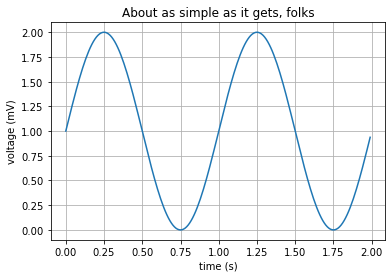

In [22]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
      title='About as simple as it gets, folks')
ax.grid()

plt.show()

# Gradient Descent 구현

In [41]:
# 손실 함수 정의 (Analytic)
import numpy as np
def f(x):
    return 0.1*x**4 - 1.5*x**3 + 0.6*x**2 + 1.0*x + 20.0

In [42]:
# 손실 함수 미분 정의
def df_dx(x):
    return 0.4*x**3 - 4.5*x**2 + 1.2*x + 1.0

In [43]:
# 하이퍼 파라미터 정의
x = 5
eps = 1e-5
lr = 0.01
max_epoch = 1000

In [44]:
# Gradient Descent 알고리즘 구현
min_x = x
min_y = f(min_x)
for _ in range(max_epoch):
    grad = df_dx(x)
    new_x = x - lr * grad
    y = f(new_x)
    
    if min_y > y:
        min_x = new_x
        min_y = y
    
    if np.abs(x - new_x) < eps:
        break
        
    x = new_x

In [45]:
print(min_x, min_y)

10.955323272631201 -428.84677390087836


### 알고리즘 결과 Visualization

In [52]:
# 위 알고리즘을 함수화
def gradient_descent(initial_x, max_epoch=1000, learning_rate=0.01, eps=1e-5):
    x = initial_x
    
    x_log = [x]
    
    min_x = x
    min_y = f(min_x)
    for _ in range(max_epoch):
        grad = df_dx(x)
        new_x = x - learning_rate * grad
        y = f(new_x)
        
        x_log.append(new_x)

        if min_y > y:
            min_x = new_x
            min_y = y

        if np.abs(x - new_x) < eps:
            break

        x = new_x
    return min_x, min_y, x_log

In [53]:
min_x1, min_y1, x_log1 = gradient_descent(5)
min_x2, min_y2, x_log2 = gradient_descent(-5)

y_log1 = f(np.array(x_log1))
y_log2 = f(np.array(x_log2))

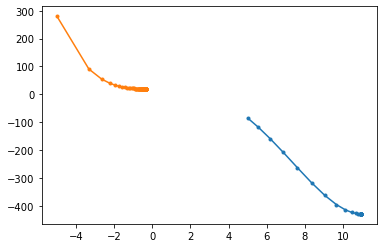

In [54]:
# visualization
import matplotlib.pyplot as plt

plt.plot(x_log1, y_log1, '.-')
plt.plot(x_log2, y_log2, '.-')
plt.show()